# Introduction to GWpy

Welcome to the quickstart tutorial on GWpy, originally written for the GW Open Data Workshop, 2018

This tutorial will briefly describe GWpy, a python package for gravitational astrophysics, and walk-through how you can use this to speed up access to, and processing of, GWOSC data.

<div class="alert alert-info">This notebook, and others in this series, were generated using python 3.7, but should work on python 2.7, 3.6, or 3.7.</div>

## Installing GWpy
First, we need to install GWpy.
To do that in our notebook we use [`pip`](https://docs.python.org/3.6/installing/), but **it is recommended** to use [conda](https://docs.ligo.org/lscsoft/conda/) on your own machine.
This usage might look a little different than normal, simply because we want to do this directly from the notebook.

In [1]:
import sys
!{sys.executable} -m pip install "gwosc==0.4.0" "gwpy==0.14.0"

To verify that this worked, we can try to `import gwpy` and inspect the path and version number:

In [3]:
import gwpy
print(gwpy.__version__)

0.12.2+430.g5e825141


## A note on object-oriented programming

Before we dive too deeply, its worth a quick aside on object-oriented programming (OOP).
GWpy is heavily object-oriented, meaning almost all of the code you run using GWpy is based around an object of some type, e.g. `TimeSeries`.
Most of the methods (functions) we will use are attached to an object, rather than standing alone, meaning you should have a pretty good idea of what sort of data you are dealing with (without having to read the documentation!).

For a quick overview of object-oriented programming in Python, see [this blog post by Jeff Knupp](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/).

## Finding open data

We have seen already that the `gwosc` module can be used to query for what data are available on LOSC.
The next thing to do is to actually read some open data.
Let's try to get some for GW150914, the first direct detection of an astrophysical gravitational-wave signal.

We can use the [`TimeSeries.fetch_open_data`](https://gwpy.github.io/docs/stable/api/gwpy.timeseries.TimeSeries.html#gwpy.timeseries.TimeSeries.fetch_open_data) method to download data directly from https://www.gw-openscience.org, but we need to know the GPS times.
We can query for the GPS time of an event as follows:

In [4]:
from gwosc.datasets import event_gps
gps = event_gps('GW170817')
print(gps)

1187008882.4


Now we can build a `[start, end)` GPS segment to 10 seconds around this time, using integers for convenience:

In [14]:
segment = (int(gps)-5, int(gps)+5)
print(segment)

(1187008877, 1187008887)


and can now query for the full data.
For this example we choose to retrieve data for the LIGO-Livingston interferometer, using the identifier `'L1'`.
We could have chosen any of

- `'G1`' - GEO600
- `'H1'` - LIGO-Hanford
- `'L1'` - LIGO-Livingston
- `'V1'` - (Advanced) Virgo

In the future, the Japanese observatory KAGRA will come online, with the identifier `'K1'`.

In [15]:
from gwpy.timeseries import TimeSeries
data = TimeSeries.fetch_open_data('H1', *segment, verbose=True)
print(data)

Fetched 2 URLs from www.gw-osc.org for [1187008877 .. 1187008887))
Reading data... [Done]
TimeSeries([-4.70701276e-19, -4.77519734e-19, -4.70838351e-19,
            ..., -3.65035985e-19, -3.80810766e-19,
            -3.83224728e-19]
           unit: dimensionless,
           t0: 1187008877.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


The `verbose=True` flag lets us see that GWpy has discovered two files that provides the data for the given interval, downloaded them, and loaded the data.
The files are not stored permanently, so next time you do the same call, it will be downloaded again, however, if you know you might repeat the same call many times, you can use `cache=True` to store the file on your computer.

We have now downloaded real LIGO data for GW170817! These are the actual data used in the analysis that discovered the first binary neutron star merger.

To sanity check things, we can easily make a plot, using the [`plot()`](https://gwpy.github.io/docs/stable/timeseries/plot.html) method of the `data` `TimeSeries`.

<div class="alert alert-info">
Since this is the first time we are plotting something in this notebook, we need to make configure `matplotlib` (the plotting library) to work within the notebook properly:
</div>

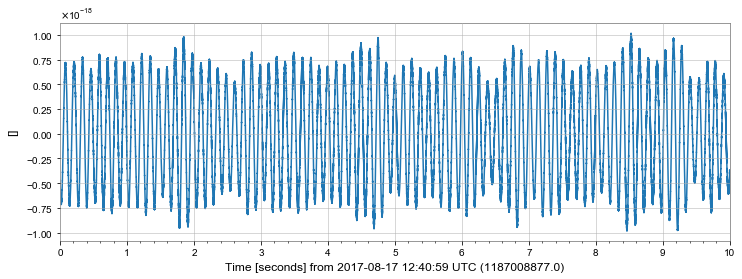

In [16]:
%matplotlib inline
plot = data.plot()

## Challenges

- plot the data for the LIGO-Hanford detector around GW150914